# Code to generate random incompressible flow snap-shots

In [58]:
import numpy as np
import scipy as sp
import scipy.ndimage
import scipy.interpolate
import matplotlib.pyplot as plt
import cv2

## Parameters

In [59]:
GridSize = 100
SmoothenSigma = 10

## Random seed-field

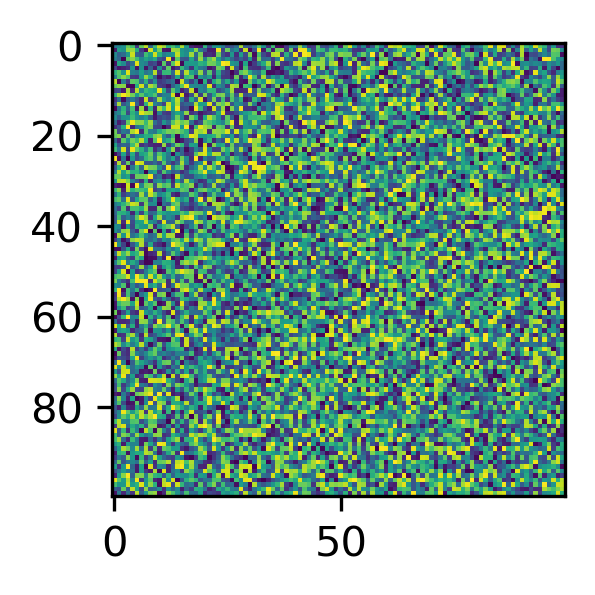

In [60]:
RandomField = np.random.rand( GridSize , GridSize )

fig = plt.figure(figsize=(2,2), dpi=300)
plt.imshow( RandomField )
plt.show()

## Smooth the random field

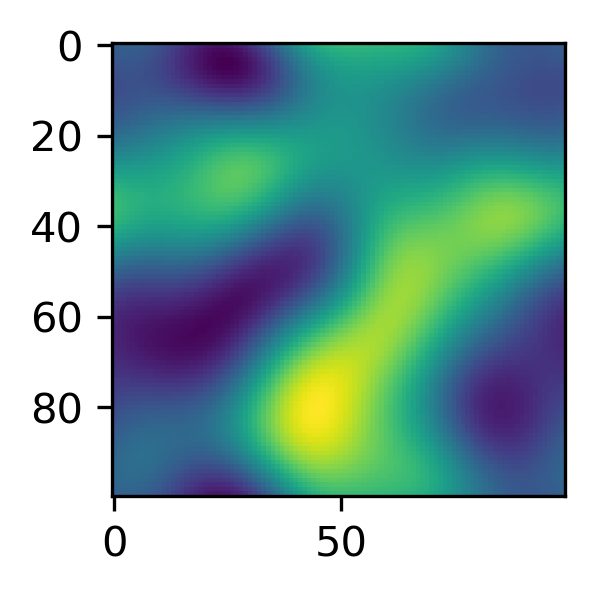

In [61]:
StreamFunction = sp.ndimage.gaussian_filter( RandomField , sigma=SmoothenSigma , mode='wrap' )

fig = plt.figure(figsize=(2,2), dpi=300)
plt.imshow( StreamFunction )
plt.show()

## Flow from stream function: $\psi$
### For any smooth random scalar field $\psi$, the velocity field is given by
### $ \vec{u} = \nabla \times \psi $
### such that, $\nabla . \vec{u} = 0$, i.e. incompressible.

## Calculation of velocity field

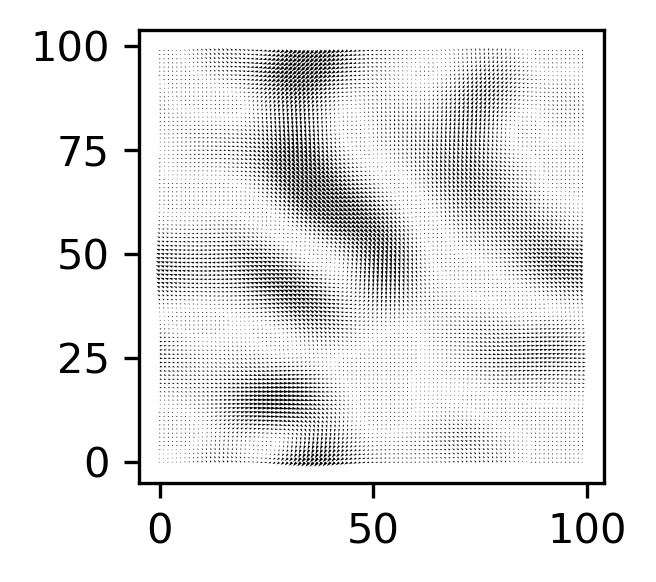

In [62]:
Vx =  np.gradient( StreamFunction , axis=0 )
Vy = -np.gradient( StreamFunction , axis=1 )

Speed = np.sqrt( Vx*Vx + Vy*Vy )
MaxSpeed = np.max( Speed )

Vx = Vx / MaxSpeed
Vy = Vy / MaxSpeed

fig = plt.figure(figsize=(2,2), dpi=300)
plt.quiver( Vx , Vy , units='width' )
plt.show()

In [74]:
plt.imsave('Vx.png',Vx)
plt.imsave('Vy.png',Vy)

## Vorticity: $\omega$
### In 2D,
### $\omega = \nabla \times \vec{u} = \nabla^2 \psi$

## Calculation of vorticity

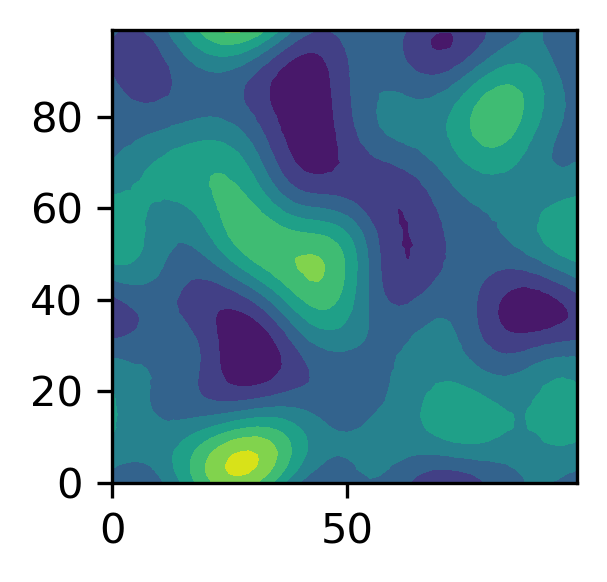

In [64]:
Vorticity = sp.ndimage.laplace( StreamFunction , mode='wrap' )

fig = plt.figure(figsize=(2,2), dpi=300)
plt.contourf( Vorticity )
plt.show()

In [65]:
NumberParticles = 10000

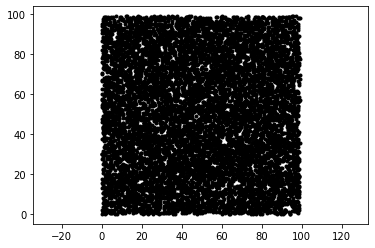

In [66]:
ParticleX = (GridSize-1) * np.random.rand( NumberParticles )
ParticleY = (GridSize-1) * np.random.rand( NumberParticles )

plt.plot( ParticleX , ParticleY , '.k' )
plt.axis('equal')
plt.show()

In [67]:
GridXY = range(GridSize)

VxInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , Vx )
VyInterp = sp.interpolate.RegularGridInterpolator( (GridXY , GridXY) , Vy )

In [68]:
ParticleVx = VxInterp( (ParticleY , ParticleX) )
ParticleVy = VyInterp( (ParticleY , ParticleX) )

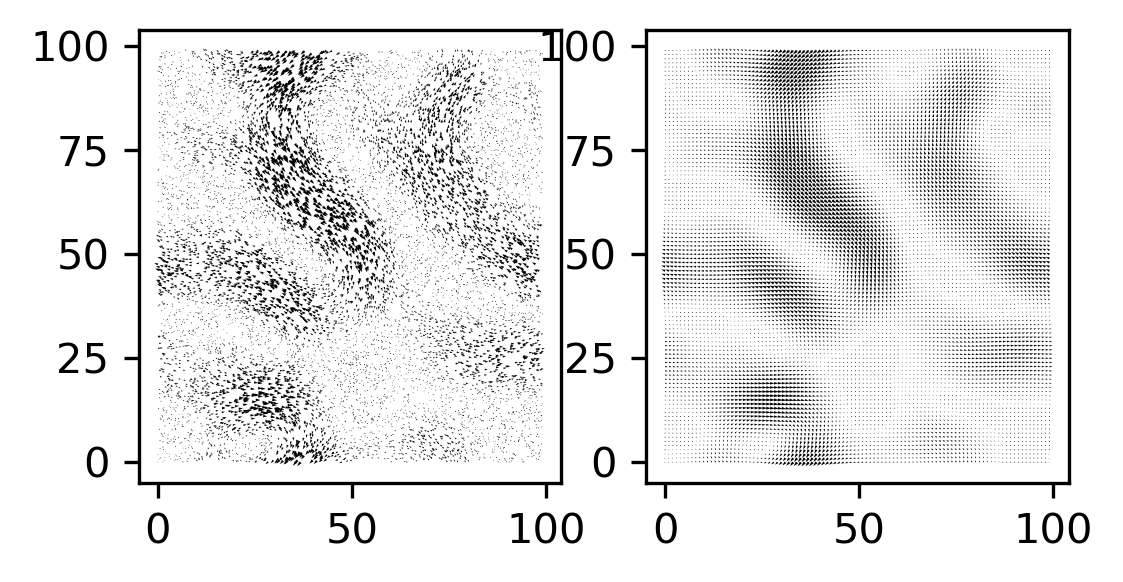

In [69]:
fig = plt.figure(figsize=(4,2), dpi=300)
fig.add_subplot(1,2,1)
plt.quiver( ParticleX , ParticleY , ParticleVx , ParticleVy , units='width' )
fig.add_subplot(1,2,2)
plt.quiver( Vx , Vy , units='width' )
plt.show()

# Particle evolution

In [70]:
MaxIterations = 1
dt = 10

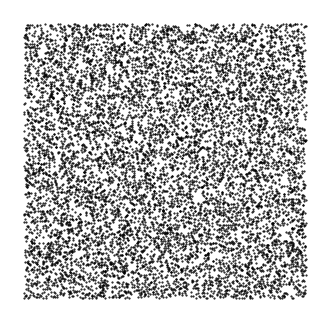

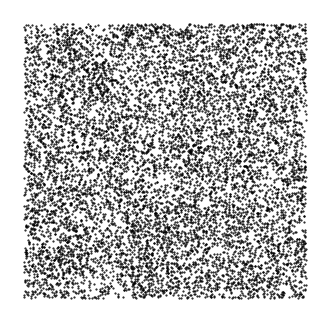

In [71]:
fig = plt.figure(figsize=(4,4), dpi=100)
plt.plot( ParticleX , ParticleY , '.k' , markersize=1 )
plt.axis('off')
plt.savefig('AA.png',bbox_inches='tight',transparent=False,pad_inches = 0)

for Iteration in range( MaxIterations ):

    ParticleVx = VxInterp( (ParticleY , ParticleX) )
    ParticleVy = VyInterp( (ParticleY , ParticleX) )

    ParticleX = ParticleX + dt * ParticleVx
    ParticleY = ParticleY + dt * ParticleVy

    ParticleX = np.mod( ParticleX , GridSize-1 )
    ParticleY = np.mod( ParticleY , GridSize-1 )

fig = plt.figure(figsize=(4,4), dpi=100)
plt.plot( ParticleX , ParticleY , '.k' , markersize=1 )
plt.axis('off')
plt.savefig('AAA.png',bbox_inches='tight',transparent=False,pad_inches = 0)
